In [2]:
def loadDataSet():
    dataMat=[]
    labelMat=[]
    with open("testSet.txt") as fr:
        for line in fr.readlines():
            lineArr = line.strip().split()
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
        return dataMat, labelMat

In [3]:
def sigmoid(inX):
    return 1.0 / (1+exp(-inX))

In [4]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights.getA()


In [5]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    print(">>>>>>>>>>>>>>", type(x))
    y = (-weights[0][0] - weights[1][0] * x) / weights[2][0]
    print(">>>>>>>>>>>>>>>>Y: ", y)
    #x.shape = y.shape#属性也是可以改的
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel("X2")
    plt.show()

In [6]:
from numpy import *


In [7]:
dataArr, labelMat = loadDataSet()

In [9]:
weights = gradAscent(dataArr, labelMat)

In [10]:
weights

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

In [11]:
plotBestFit(weights)

>>>>>>>>>>>>>> <class 'numpy.ndarray'>
>>>>>>>>>>>>>>>>Y:  [4.35102773 4.42885454 4.50668136 4.58450817 4.66233498 4.7401618
 4.81798861 4.89581542 4.97364223 5.05146905 5.12929586 5.20712267
 5.28494949 5.3627763  5.44060311 5.51842993 5.59625674 5.67408355
 5.75191037 5.82973718 5.90756399 5.9853908  6.06321762 6.14104443
 6.21887124 6.29669806 6.37452487 6.45235168 6.5301785  6.60800531
 6.68583212 6.76365893 6.84148575 6.91931256 6.99713937 7.07496619
 7.152793   7.23061981 7.30844663 7.38627344 7.46410025 7.54192706
 7.61975388 7.69758069 7.7754075  7.85323432 7.93106113 8.00888794
 8.08671476 8.16454157 8.24236838 8.32019519 8.39802201 8.47584882
 8.55367563 8.63150245 8.70932926 8.78715607 8.86498289 8.9428097 ]


<Figure size 640x480 with 1 Axes>

In [12]:
%matplotlib inline

>>>>>>>>>>>>>> <class 'numpy.ndarray'>
>>>>>>>>>>>>>>>>Y:  [4.35102773 4.42885454 4.50668136 4.58450817 4.66233498 4.7401618
 4.81798861 4.89581542 4.97364223 5.05146905 5.12929586 5.20712267
 5.28494949 5.3627763  5.44060311 5.51842993 5.59625674 5.67408355
 5.75191037 5.82973718 5.90756399 5.9853908  6.06321762 6.14104443
 6.21887124 6.29669806 6.37452487 6.45235168 6.5301785  6.60800531
 6.68583212 6.76365893 6.84148575 6.91931256 6.99713937 7.07496619
 7.152793   7.23061981 7.30844663 7.38627344 7.46410025 7.54192706
 7.61975388 7.69758069 7.7754075  7.85323432 7.93106113 8.00888794
 8.08671476 8.16454157 8.24236838 8.32019519 8.39802201 8.47584882
 8.55367563 8.63150245 8.70932926 8.78715607 8.86498289 8.9428097 ]


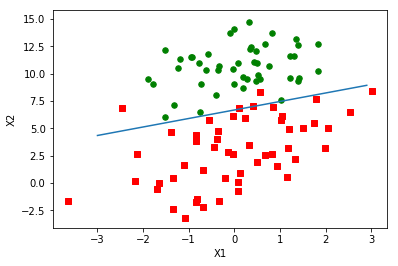

In [13]:
plotBestFit(weights)

In [25]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    print(">>>>>>>>>>>type(dataMatrix): ", type(dataMatrix), len(dataMatrix))
    dataMatrix = array(dataMatrix)#如果不把这个列表转化成数组的话，后面的乘法会报错
    m, n = shape(dataMatrix)
    weights = ones(n)
    print(">>>>>>>>>weights: ", weights, weights.shape)
    for j in range(numIter+1):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0+j+i) + 0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))#此时是数组相乘
            #print(">>>>>>>>>>>type(weights): ", type(weights))
            #print(">>>>>>>>>>>type(dataMatrix[randIndex]): {} \n,\
                   #>>>>>>>>>>>dataMatrix[randIndex]: {}".format(type(dataMatrix[randIndex]), dataMatrix[randIndex]))
            error = classLabels[randIndex] - h
            #print(">>>>>>>>>>>h: ", h)
            #此时是数相乘，如果前面没有把dataMatrix转化成数组的话，列表乘以一个实数是把列表的长度变长的
            weights += alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])#如果是range的话，是不能删掉索引的
        if j%50 == 0:
            print(">>>>>>>>>第{}次迭代， weight为： {}, 误差为: {}".format(j, weights, error))
    print(">>>>>>>>>>>>>>>最终weights: {}".format(weights.shape))
    return weights

In [38]:
#预测
def classifyVector(inX, weights):
    #print(">>>>>>>>>>>>>预测中>>>>>输入为：", type(inX), inX.shape, type(weights), weights.shape)
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [39]:
def colicTest(k):
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(trainingSet, trainingLabels, 500)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = float(errorCount) / numTestVec
    print("第{}次迭代的误差为{}: ".format(k+1, errorRate))
    return errorRate

In [40]:
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest(k)
        averageErrorRate = errorSum / float(numTests)
    print("经过{}次迭代， 平均误差率为{}".format(numTests, averageErrorRate))

In [41]:
multiTest()

>>>>>>>>>>>type(dataMatrix):  <class 'list'> 299
>>>>>>>>>weights:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] (21,)
>>>>>>>>>第0次迭代， weight为： [  -0.99895998   12.7719207   -43.52876055 -100.42878543  113.57405946
   -6.41571654   -7.55403298  -14.79905875   -3.67425921   -7.98278346
   -2.91265987  -11.59013415   -2.92466741   -0.21483885    0.96568046
   -8.45230792  -11.59772185  111.65740693   26.12744569    2.29999055
    3.53946549], 误差为: -4.617033597349013e-44
>>>>>>>>>第50次迭代， weight为： [ 16.47039106  -1.35992276   6.69073341  -7.30276929   5.90778983
  -7.58313696  -9.11165403 -29.85392744  -5.3961222  -29.10820418
  29.39465786 -27.52953624  40.62890346  10.70324823 -28.52840609
  17.28068826   0.47803465   1.7386924    1.07319603 -15.29566712
 -13.9865192 ], 误差为: -1.3995870285610948e-37
>>>>>>>>>第100次迭代， weight为： [ 19.21822137  -2.48369488   5.80824786  -3.63770199   0.06408813
  -8.94267725  -5.08197769 -24.03706262  -8.45552319 -29.23465538
  36.10340336

>>>>>>>>>第150次迭代， weight为： [ 26.97790939  -2.94896934   6.53942781  -3.82762824   1.66278908
  -8.60530579  -0.18802496 -22.35152971  -7.15052642 -24.79080341
  41.65613923 -43.14906204  55.73069206  19.75269796 -28.05833562
   9.86370126  -4.93294559  -0.48443377   0.19578107 -18.3764531
  -2.55291902], 误差为: -1.96390221739912e-39
>>>>>>>>>第200次迭代， weight为： [ 25.66910274  -2.43388709   6.39051531  -5.41902272   4.13718502
  -8.76693101   3.38845122 -18.89747638  -8.95429838 -24.39689406
  42.61281461 -46.55031252  55.82134245  22.50823342 -25.00289012
   9.02961364  -2.63254377  -1.61898401   0.99206047 -14.49403707
  -4.69611837], 误差为: -3.1354956799613685e-74
>>>>>>>>>第250次迭代， weight为： [ 25.93122627  -1.92514477   3.12890061  -3.54693627   0.97985858
  -7.66317262   2.17717595 -16.16929531 -10.89659669 -21.25474858
  41.78831784 -45.86523261  55.75562409  24.07164605 -23.34273244
   6.78908981  -5.57442946  -0.5893698   -0.27604814 -13.26797293
  -5.49894647], 误差为: -4.153698628021267e

>>>>>>>>>第200次迭代， weight为： [ 2.61720566e+01 -4.27464504e+00  7.39208737e+00 -4.03202625e+00
  2.93333342e+00 -9.38894626e+00  2.69010582e+00 -2.01606762e+01
 -1.31296261e+01 -2.49057974e+01  4.22781252e+01 -4.64428341e+01
  5.63882803e+01  2.42455110e+01 -2.68294578e+01  1.08708766e+01
 -6.97416054e+00 -4.78617745e-02 -1.34327394e+00 -1.71760555e+01
 -3.46635344e+00], 误差为: -2.0287653914221206e-24
>>>>>>>>>第250次迭代， weight为： [ 27.59442752  -4.46620862   5.60950142  -4.83198347   2.09240413
  -9.0730175    2.82894214 -19.74974953 -14.05934863 -23.03402888
  43.25832956 -47.28141682  57.64020178  27.41237569 -24.31207796
  10.55389353  -4.54798563   0.24040189   1.92376383 -17.79521067
  -3.08540695], 误差为: -1.0034208482027054e-59
>>>>>>>>>第300次迭代， weight为： [ 27.4307606   -2.58059198   4.38029291  -2.52483824   3.56212226
  -9.84406598   4.05862184 -15.5975747  -15.00011996 -20.49545004
  43.53594983 -48.53416374  55.47298126  26.18028108 -27.31304091
   7.40873649  -6.01035892  -1.14527833

>>>>>>>>>第250次迭代， weight为： [ 26.89859259  -3.85407743   6.08720418  -4.06922208   1.72838795
  -9.37897767   1.17633522 -17.67119667 -11.36402902 -20.17461894
  44.2899475  -47.3184748   57.58313427  19.91274443 -24.5636144
   9.68872305  -6.86430174  -0.96149756  -0.2163002  -15.41957092
  -3.03303289], 误差为: -2.291665668007281e-64
>>>>>>>>>第300次迭代， weight为： [ 25.5007438   -2.95316969   4.99979473  -4.83133504   0.85972022
 -11.31684389   2.98006955 -16.05879799 -13.58252067 -19.18039772
  42.71546383 -46.52310754  55.9076247   21.20269881 -23.83231753
   5.74367882  -5.75723375   1.11004382  -0.74478039 -15.4767701
  -6.0415059 ], 误差为: -2.964230959926236e-81
>>>>>>>>>第350次迭代， weight为： [ 24.57578154  -4.02572631   4.22659692  -4.36877154   1.81541538
 -11.70166761   3.66239295 -13.90434298 -13.80006465 -19.49523214
  39.68825684 -46.17490423  55.45296027  22.03439846 -22.60993452
   6.51752147  -5.95173806   0.53572589  -0.56545389 -13.43802802
  -4.08924011], 误差为: -1.076035293829368e-

>>>>>>>>>第300次迭代， weight为： [ 28.22282017  -5.44002459   5.27618362  -4.3008239    3.76295169
 -10.59060236   6.51265785 -18.19821072 -15.42842936 -20.69951556
  42.7508058  -47.04770283  55.14136028  22.60232708 -24.3653139
  10.74641895  -7.19626992  -1.76424373   1.97984169 -14.47772486
  -3.8137341 ], 误差为: -6.990086127146245e-68
>>>>>>>>>第350次迭代， weight为： [ 2.69328135e+01 -4.09557112e+00  6.44915957e+00 -5.21128066e+00
  1.40253201e+00 -1.13722627e+01  6.00547912e+00 -1.68983073e+01
 -1.62553675e+01 -1.80013373e+01  4.00005307e+01 -4.77279176e+01
  5.38870263e+01  2.24810914e+01 -2.53899941e+01  8.87482622e+00
 -6.08811558e+00  1.03509217e-02 -7.32815925e-01 -1.49700724e+01
 -5.05827030e+00], 误差为: -2.375441918382074e-81
>>>>>>>>>第400次迭代， weight为： [ 25.10362648  -3.35348513   5.1353449   -4.00545413   3.11146429
 -10.98310943   6.25901918 -14.56351559 -17.0509502  -18.29675672
  38.63349824 -47.66384634  53.48443371  23.83536458 -24.52824994
   9.17194555  -5.47603124   1.43581822   